<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/28.03.2024/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [3]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

In [23]:
housing = df[df.district=='Чиланзарский']
housing.head(25)

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
9,Чиланзарский,1,30.0,1,4,22200.0
11,Чиланзарский,3,67.0,2,5,30200.0
12,Чиланзарский,1,30.0,2,4,21200.0
13,Чиланзарский,1,30.0,2,4,21200.0
14,Чиланзарский,1,30.0,2,4,21200.0


In [5]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [13]:
y = housing['price']
y

(1616,)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

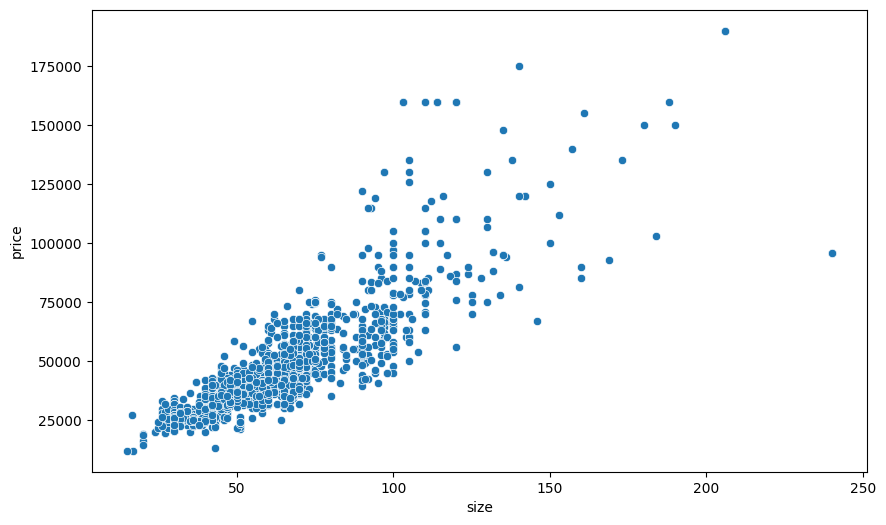

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

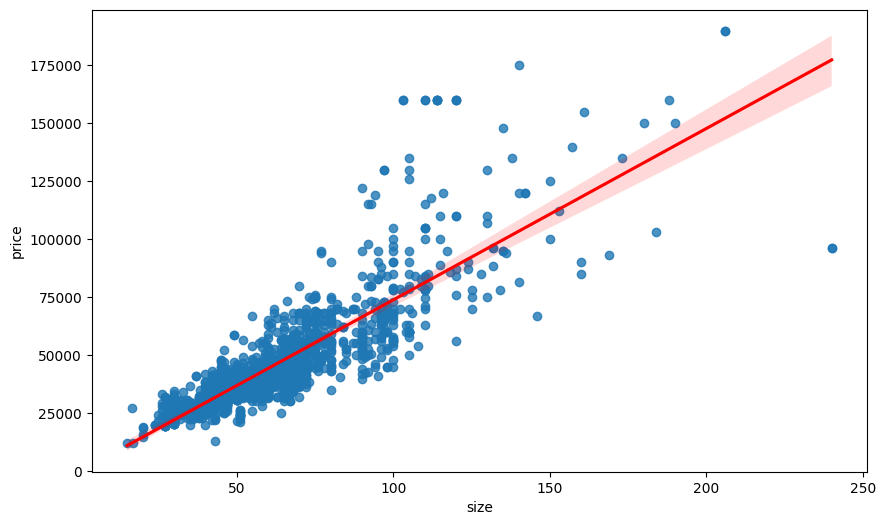

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [24]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y)

In [25]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"{theta1=}")

theta1=740.0264822713287


In [26]:
theta0 = ymean-theta1*Xmean
print(f"{theta0=}")

theta0=-195.94911352690542


In [30]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test= }")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test= }")

x_test= array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test= array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [31]:
y_predict = theta0+theta1*x_test
print(f"{y_predict = }")

y_predict = array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


In [33]:
#MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE = }")

MAE = 4140.35031634715


In [34]:
#RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))

print(f"{RMSE = }")

RMSE = 5882.051673173715


# implimention with Scikit-learn

In [35]:
housing.shape

(1616, 6)

In [37]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [38]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# training (tarbiyalash)
LR_model.fit(x_train, y_train)

#separating theta1 and theta0
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]

print(f"{theta1 =}")
print(f"{theta0 =}")

theta1 =732.7784051414766
theta0 =106.31843170110369


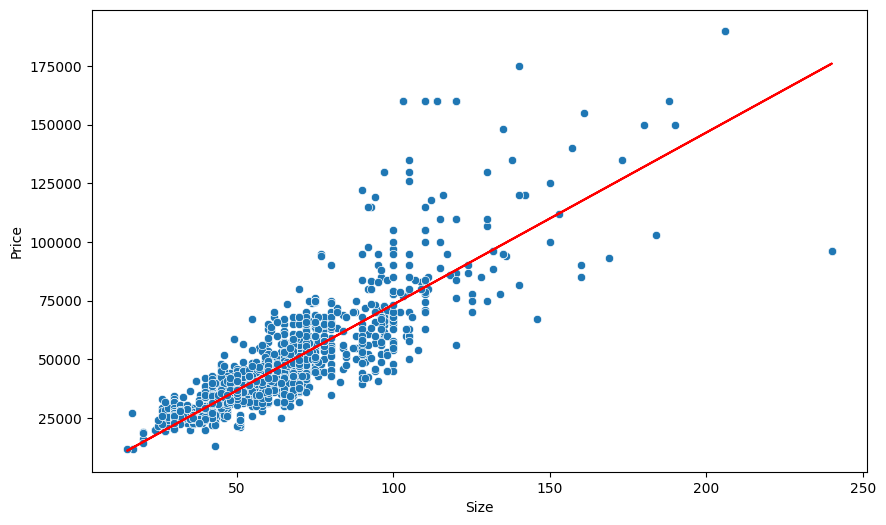

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

# modelni baholash

In [42]:
x_test = np.asanyarray(test_set[['size']])
y_test =  np.asanyarray(test_set[['price']])

In [43]:
y_predict = LR_model.predict(x_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

print(f"{MAE = }")
print(f"{RMSE = }")


MAE = 7269.709648262382
RMSE = 12734.803748258666
